#Oscilaciones de dos masas acopladas por resortes
##Josué Juárez Morales
---------
Sean $m_1, m_2$ las masas de dos partículas conectadas por tres resortes con constantes elásticas $k_{1}, k_{2}$ y $k_3$.  El hamiltoniano del sistema esta dado por

\begin{equation}
H = \frac{p_{1}^{2}}{2m_1}  + \frac{p_{2}^{2}}{2m_2} + \frac{1}{2} k_1 x_{1}^{2} + \frac{1}{2} k_{2} (x_{2} - x_{1})^{2} + \frac{1}{2} k_3 x_{2}^{2},
\end{equation}

de las ecuaciones de Hamilton

\begin{equation}
\dot{x_i} = \frac{\partial H}{\partial p_i}
\end{equation}

\begin{equation}
\dot{p_i} = - \frac{\partial H}{\partial q_i}
\end{equation}

obtenemos las 4 ecuaciones de moviento de este sistema

\begin{equation}
\dot{x_1} = \frac{p_1}{m_1}
\end{equation}
\begin{equation}
\dot{x_2} = \frac{p_2}{m_2}
\end{equation}

\begin{equation}
\dot{p_1} = - k_{1} x_{1} + k_{2} (x_{2} - x_{1})
\end{equation}
\begin{equation}
\dot{p_2} = - k_{3} x_{2} - k_{2} (x_{2} - x_{1})
\end{equation}

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def Q_Dot(Q):
  #regresa la derivada del vector Q
  x1, x2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
  x1_dot = p1/m1
  x2_dot = p2/m2
  p1_dot = -k1*x1 + k2*(x2-x1)
  p2_dot = -k3*x2 - k2*(x2-x1)

  return np.array([x1_dot, x2_dot,  p1_dot, p2_dot])

In [0]:
def paso_euler(f, t_n, y_n, dt):
  #toma un paso usando el metodo de Euler, y_n-valor actual del vector at tiempo t=t_n, f - funcion de calcula la derivada de y(t)
  y_dot = f(t_n,y_n)
  y_n_mas_1 = y_n + dt*y_dot
  return y_n_mas_1

In [0]:
def integrador_simple(f, t, y_0, dt):
  #Calcula la trayectoria de valores de y usando el metodo de Euler con pasos constantes
  # f - función que calcula la derivada y(t), f(t,y)
  # y_0 - valor inicial de y y_0 = [y0_0, y1_0,...]
  #t - lista con el intervalo [t_0, t_f]
  #dt - distancia entre pasos de tiempo
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  
  d = len(y_0)
  
  y_tray = np.zeros(((n+1), d))
  
  t = np.linspace(t_0, t_f, n+1)
  
  y_tray[0, :] = y_0

  tiempo = time.time() - tiempo
  
  for i in range(n):
    y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)

  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')

  return t, y_tray

In [0]:
def Q_Dot_t(t,y):
  return Q_Dot(y)

Probamos para los siguientes parámetros. Además de la teoria sabemos que en este sistema hay dos modos normales de movimiento: el modo antisimétrico y el simétrico.

El movimiento de las masas será en modo simétrico si se dan las condiciones iniciales $x_{1}(0) = - x_{2}(0)$ y $p_{1}(0) = - p_{2}(0)$-

In [0]:
k1= 1.0
k2= 0.5
k3 = 1.5
m1 = 1.0
m2 = 1.5

Tiempo de computo = 0.00141s


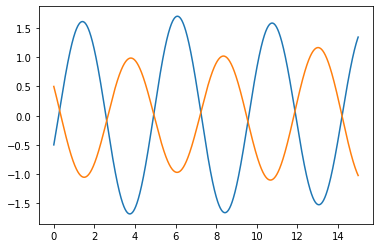

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.5, 0.5, 2, -2],.001 )

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Para el caso del movimiento en modo simétrico, las condiciones iniciales deben ser $x_{1}(0) = x_{2}(0)$ y $p_{1}(0) = p_{2}(0)$.

In [0]:
k1= 1.0
k2= 1.5
k3 = 0.5
m1 = 0.5
m2 = 1.5

Tiempo de computo = 0.00070s


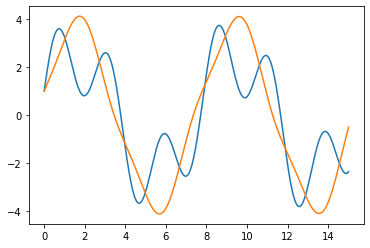

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[1, 1, 3, 3],.001 )

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Uno de los teoremas de conservación nos dice que si el Lagrangiano del sistema no depende explicitamente del tiempo entonces el Hamiltoniano se conserva

\begin{equation}
H = E = cte.
\end{equation}

Podemos calcular los valores de $E$ en los diferentes tiempos con los valores ya calculados.

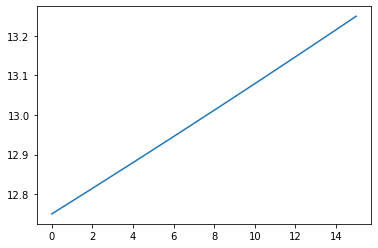

In [0]:
E = np.zeros((Q_Traj.shape[0], 1))
E[:,0] = (1/(2*m1))*Q_Traj[:,2]**2 + (1/(2*m2))*Q_Traj[:,3]**2 + (k1/2)*Q_Traj[:,0]**2 + (k2/2)*(Q_Traj[:,1] - Q_Traj[:,0])**2 + (k3/2)*Q_Traj[:,1]**2
plt.plot(t,E)

Observamos que hubo un aumento lineal de la energia en todo el intervalo de tiempo. Este aumento de energia se debe a los errores númericos que se generarón durante la solucion de las ecuaciones. Observamos que para las mismas condiciones pero haciendo mas pequeño el intervalo de tiempo la solucion de las ecuaciones son mas exactas y el aumento de energia debido al error númerico es menor.

Tiempo de computo = 0.02325s


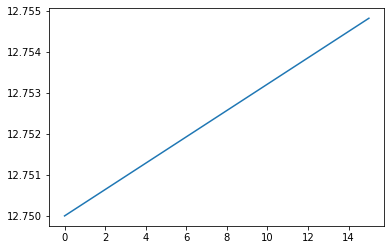

In [0]:
k1= 1.0
k2= 1.5
k3 = 0.5
m1 = 0.5
m2 = 1.5
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[1, 1, 3, 3],.00001 )
E = np.zeros((Q_Traj.shape[0], 1))
E[:,0] = (1/(2*m1))*Q_Traj[:,2]**2 + (1/(2*m2))*Q_Traj[:,3]**2 + (k1/2)*Q_Traj[:,0]**2 + (k2/2)*(Q_Traj[:,1] - Q_Traj[:,0])**2 + (k3/2)*Q_Traj[:,1]**2
plt.plot(t,E)

vemos en la gráfica un aumento de $\Delta E = 0.005$

#sistema de n particulas acopladas con resortes
-------------
El hamiltoniano de un sistema de n particulas de masa $m_i = m$ acoplados por resortes de constante elastica $k_i = k$ esta dado por

\begin{equation}
H = \sum_{i = 1}^{n} \frac{p_{i}^{2}}{2m_{i}} + \sum_{i = 0}^{n} \frac{k}{2} (x_{i+1} - x_{i})^{2},
\end{equation}

y las ecuaciones de movimiento son

\begin{equation}
\dot{x_{i}} = \frac{\partial H}{\partial p_i} = \frac{p_i}{m},
\end{equation}

\begin{equation}
\dot{p_{i}} = - \frac{\partial H}{\partial x_i} = k(x_{i+1} - 2x_{i} + x_{i-1}).
\end{equation}

In [0]:
k = 1
m = 1
N = 4

In [0]:
def Q_DotN(Q, N):
  #regresa la derivada del vector Q
  Q_dot = np.zeros((1, 2*N))

  for i in range(0, N):
    Q_dot[0,i] = Q[i]/m #xi_dot
    if i == 0:
      Q_dot[0,i+N] = k*(Q[i+1] - Q[i]) #pi_dot
    else:
      Q_dot[0,i+N] = k*(Q[i+1] - 2*Q[i] + Q[i-1]) #pi_dot

  return Q_dot

In [0]:
def Q_Dot_t_N(t,y):
  return Q_DotN(y, N)

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t_N,[0,15],[-0.5, 0.5, 2, -2],.001 )

plt.plot(t,Q_Traj[:,0])

IndexError: ignored

Pendiente arreglar el calculo de las componentes de Q_Dot. Con eso solucionado, las funciones ya definidas antes funcionan correctamente.